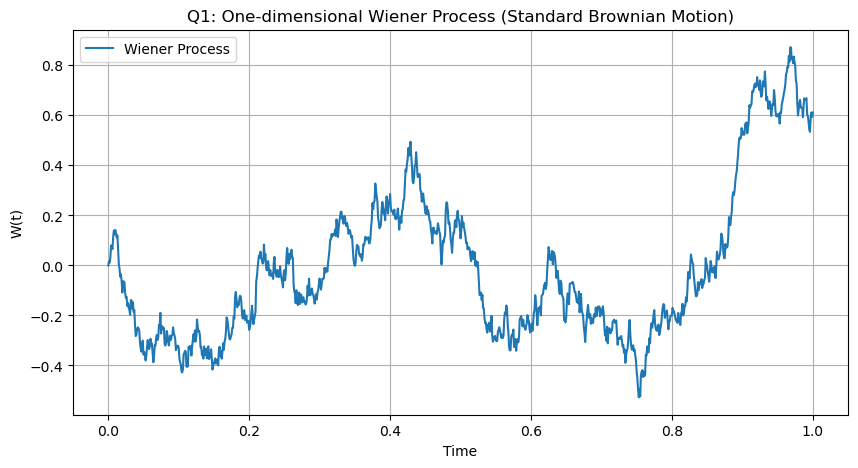

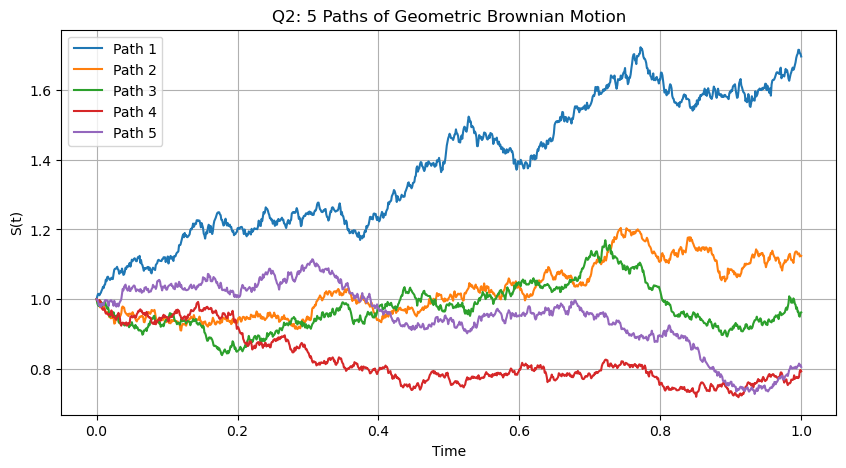

Q3: E[W(0.5) * W(0.8)]
Empirical: 0.4946, Theoretical: 0.5

Q4:
Mean of increment W(t)-W(s): 0.0032
Variance: 0.4015 (Expected: 0.39999999999999997)
Correlation with W(s): -0.0018 (should be ~ 0 for independence)

Q5:
E[W(t) - W(s)] = -0.0013 ⇒ Brownian motion is a martingale.


In [1]:
# Brownian Motion Simulations and Theoretical Properties

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm

# Set a seed for reproducibility
np.random.seed(42)

# ---------------------------------------------------------------
# Q1: Simulate a single path of a one-dimensional Wiener process
# ---------------------------------------------------------------

def simulate_brownian_motion(T=1.0, N=1000):
    """
    Simulates a single path of standard Brownian motion (Wiener process)
    over the interval [0, T] with N steps.
    """
    dt = T / N
    t = np.linspace(0, T, N + 1)
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.insert(np.cumsum(dW), 0, 0)  # Start at 0
    return t, W

# Simulate and plot
T = 1.0
t, W = simulate_brownian_motion(T)
plt.figure(figsize=(10, 5))
plt.plot(t, W, label="Wiener Process")
plt.title("Q1: One-dimensional Wiener Process (Standard Brownian Motion)")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------------------------------
# Q2: Simulate 5 paths of Geometric Brownian Motion
# ---------------------------------------------------------------

def simulate_geometric_brownian_motion(S0=1.0, T=1.0, N=1000, alpha=0.1, sigma=0.2, paths=5):
    """
    Simulates multiple paths of Geometric Brownian Motion.
    """
    dt = T / N
    t = np.linspace(0, T, N + 1)
    S_paths = np.zeros((paths, N + 1))

    for i in range(paths):
        W = np.insert(np.cumsum(np.sqrt(dt) * np.random.randn(N)), 0, 0)
        S = S0 * np.exp(sigma * W + (alpha - 0.5 * sigma ** 2) * t)
        S_paths[i] = S

    return t, S_paths

# Simulate and plot
t, S_paths = simulate_geometric_brownian_motion()
plt.figure(figsize=(10, 5))
for i in range(S_paths.shape[0]):
    plt.plot(t, S_paths[i], label=f'Path {i+1}')
plt.title("Q2: 5 Paths of Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------------------------------
# Q3: Show E[W_s W_t] = min(s, t)
# ---------------------------------------------------------------

def expected_WsWt(s, t, M=100000):
    """
    Empirically estimates E[W(s) * W(t)] and compares with min(s, t).
    """
    dt = 0.001
    N = int(max(s, t) / dt)
    times = np.linspace(0, max(s, t), N + 1)
    samples = np.sqrt(dt) * np.random.randn(M, N)
    W = np.cumsum(samples, axis=1)
    W = np.hstack((np.zeros((M, 1)), W))  # W(0) = 0
    idx_s = int(s / dt)
    idx_t = int(t / dt)
    product = W[:, idx_s] * W[:, idx_t]
    empirical_mean = np.mean(product)
    theoretical = min(s, t)
    return empirical_mean, theoretical

# Show result
empirical, theoretical = expected_WsWt(0.5, 0.8)
print("Q3: E[W(0.5) * W(0.8)]")
print(f"Empirical: {empirical:.4f}, Theoretical: {theoretical}")

# ---------------------------------------------------------------
# Q4: Show that W_t - W_s ~ N(0, t - s) and increments are independent
# ---------------------------------------------------------------

def test_increment_properties(s=0.3, t=0.7, M=100000):
    """
    Tests the distribution of W(t) - W(s) and independence of increments.
    """
    dt = 0.001
    N = int(t / dt)
    samples = np.sqrt(dt) * np.random.randn(M, N)
    W = np.cumsum(samples, axis=1)
    W = np.hstack((np.zeros((M, 1)), W))
    idx_s = int(s / dt)
    idx_t = int(t / dt)

    increments = W[:, idx_t] - W[:, idx_s]

    # Check distribution ~ N(0, t - s)
    mean_inc = np.mean(increments)
    var_inc = np.var(increments)

    # Check independence with a non-overlapping interval
    W0_s = W[:, idx_s]  # W(s)
    corr = np.corrcoef(increments, W0_s)[0, 1]

    return mean_inc, var_inc, corr

mean_inc, var_inc, corr = test_increment_properties()
print("\nQ4:")
print(f"Mean of increment W(t)-W(s): {mean_inc:.4f}")
print(f"Variance: {var_inc:.4f} (Expected: {0.7 - 0.3})")
print(f"Correlation with W(s): {corr:.4f} (should be ~ 0 for independence)")

# ---------------------------------------------------------------
# Q5: Show E[W_t | F_s] = W_s ⇒ Brownian motion is a martingale
# ---------------------------------------------------------------

def conditional_expectation_martingale(s=0.5, t=0.8, M=100000):
    """
    Tests the martingale property E[W(t) | F_s] = W(s)
    by simulating conditional expectations.
    """
    dt = 0.001
    N = int(t / dt)
    samples = np.sqrt(dt) * np.random.randn(M, N)
    W = np.cumsum(samples, axis=1)
    W = np.hstack((np.zeros((M, 1)), W))
    idx_s = int(s / dt)
    idx_t = int(t / dt)

    W_s = W[:, idx_s]
    W_t = W[:, idx_t]

    # Since E[W_t | F_s] = W_s ⇒ check E[W_t - W_s] = 0
    expected_diff = np.mean(W_t - W_s)
    return expected_diff

expected_diff = conditional_expectation_martingale()
print("\nQ5:")
print(f"E[W(t) - W(s)] = {expected_diff:.4f} ⇒ Brownian motion is a martingale.")
